In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import random
from skimage import io
from sklearn import model_selection
from tensorflow import keras
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications import *
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization

%matplotlib inline

In [ ]:
labels=os.listdir('/content/drive/MyDrive/DIARETDB1/diaretdb1_v_1_1/resources/images/ddb1_groundtruth')
print(labels)

['redsmalldots', 'hardexudates', 'hemorrhages', 'softexudates', 'fundusimages']


In [ ]:
all_files=[]
for item in labels:
    files=os.listdir('/content/drive/MyDrive/DIARETDB1/diaretdb1_v_1_1/resources/images/ddb1_groundtruth'+'/'+item)
    for i in files:
        all_files.append((item,str(item+'/'+i)))

In [ ]:
all_files

[('redsmalldots', 'redsmalldots/image049.png'),
 ('redsmalldots', 'redsmalldots/image052.png'),
 ('redsmalldots', 'redsmalldots/image077.png'),
 ('redsmalldots', 'redsmalldots/image051.png'),
 ('redsmalldots', 'redsmalldots/image070.png'),
 ('redsmalldots', 'redsmalldots/image036.png'),
 ('redsmalldots', 'redsmalldots/image059.png'),
 ('redsmalldots', 'redsmalldots/image018.png'),
 ('redsmalldots', 'redsmalldots/image065.png'),
 ('redsmalldots', 'redsmalldots/image028.png'),
 ('redsmalldots', 'redsmalldots/image066.png'),
 ('redsmalldots', 'redsmalldots/image068.png'),
 ('redsmalldots', 'redsmalldots/image072.png'),
 ('redsmalldots', 'redsmalldots/image005.png'),
 ('redsmalldots', 'redsmalldots/image069.png'),
 ('redsmalldots', 'redsmalldots/image035.png'),
 ('redsmalldots', 'redsmalldots/image040.png'),
 ('redsmalldots', 'redsmalldots/image075.png'),
 ('redsmalldots', 'redsmalldots/image083.png'),
 ('redsmalldots', 'redsmalldots/image088.png'),
 ('redsmalldots', 'redsmalldots/image004

In [ ]:
data=pd.DataFrame(data=all_files,columns=['Labels','Image'])

In [ ]:
data

Labels                      Image
0    redsmalldots  redsmalldots/image049.png
1    redsmalldots  redsmalldots/image052.png
2    redsmalldots  redsmalldots/image077.png
3    redsmalldots  redsmalldots/image051.png
4    redsmalldots  redsmalldots/image070.png
..            ...                        ...
440  fundusimages  fundusimages/image083.png
441  fundusimages  fundusimages/image086.png
442  fundusimages  fundusimages/image088.png
443  fundusimages  fundusimages/image087.png
444  fundusimages  fundusimages/image089.png

[445 rows x 2 columns]

IMAGE SEGMENTATION

In [ ]:
import os
import pandas as pd

base_dir = '/content/drive/MyDrive/DIARETDB1/diaretdb1_v_1_1/resources/images'
images_dir = f'{base_dir}/ddb1_groundtruth/fundusimages'
masks_dir = f'{base_dir}/ddb1_groundtruth/softexudates'

# Get sorted list of image and mask paths
image_paths = sorted([os.path.join(images_dir, f) for f in os.listdir(images_dir)])
mask_paths = sorted([os.path.join(masks_dir, f) for f in os.listdir(masks_dir)])

# Check if the number of images and masks are the same
if len(image_paths) != len(mask_paths):
    print("Error: Number of images and masks do not match.")
else:
    # Create DataFrame
    content = {'image_path': image_paths, 'mask_path': mask_paths}
    df = pd.DataFrame(content)

In [ ]:
df.head()

image_path  \
0  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...   
1  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...   
2  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...   
3  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...   
4  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...   

                                           mask_path  
0  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...  
1  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...  
2  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...  
3  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...  
4  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...

In [ ]:
len('/content/drive/MyDrive/DIARETDB1/diaretdb1_v_1_1/resources/images/ddb1_groundtruth/fundusimages/image')

101

In [ ]:
len('/content/drive/MyDrive/DIARETDB1/diaretdb1_v_1_1/resources/images/ddb1_groundtruth/softexudates/image')

101

In [ ]:
df_imgs = df[~df['image_path'].str.contains("mask_path")]
df_masks = df[~df['mask_path'].str.contains("mask_path")]

# File path line length images for later sorting
BASE_LEN = 101
BASE_LENG = 101
END_IMG_LEN = 4
END_MASK_LEN = 3

# Data sorting
imgs = sorted(df_imgs["image_path"].values, key=lambda x : int(x[BASE_LEN:-END_IMG_LEN]))
masks = sorted(df_masks["mask_path"].values, key=lambda x : int(x[BASE_LENG:-END_IMG_LEN]))
# print(imgs)


# Sorting check
idx = random.randint(0, len(imgs)-1)
print("Path to the Image:", imgs[idx])

idx1 = random.randint(0, len(masks)-1)
print("Path to the Mask:", masks[idx1])

Path to the Image: /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1_1/resources/images/ddb1_groundtruth/fundusimages/image087.png
Path to the Mask: /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1_1/resources/images/ddb1_groundtruth/softexudates/image067.png


In [ ]:
# Final dataframe
DR_df = pd.DataFrame({"image_path": imgs,
                      "mask_path": masks
                     })
def pos_neg_diagnosis(mask_path):
    value = np.max(cv2.imread(mask_path))
    if value > 0 :
        return 1
    else:
        return 0

DR_df['mask'] = DR_df['mask_path'].apply(lambda x: pos_neg_diagnosis(x))
DR_df

image_path  \
0   /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...   
1   /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...   
2   /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...   
3   /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...   
4   /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...   
..                                                ...   
84  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...   
85  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...   
86  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...   
87  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...   
88  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...   

                                            mask_path  mask  
0   /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...     0  
1   /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...     0  
2   /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...     1  
3   /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...     1  
4   /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...     1  
..                                                ...   ...  
84  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...     1  
85  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...     0  
86  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...     0  
87  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...     0  
88  /content/drive/MyDrive/DIARETDB1/diaretdb1_v_1...     0  

[89 rows x 3 columns]

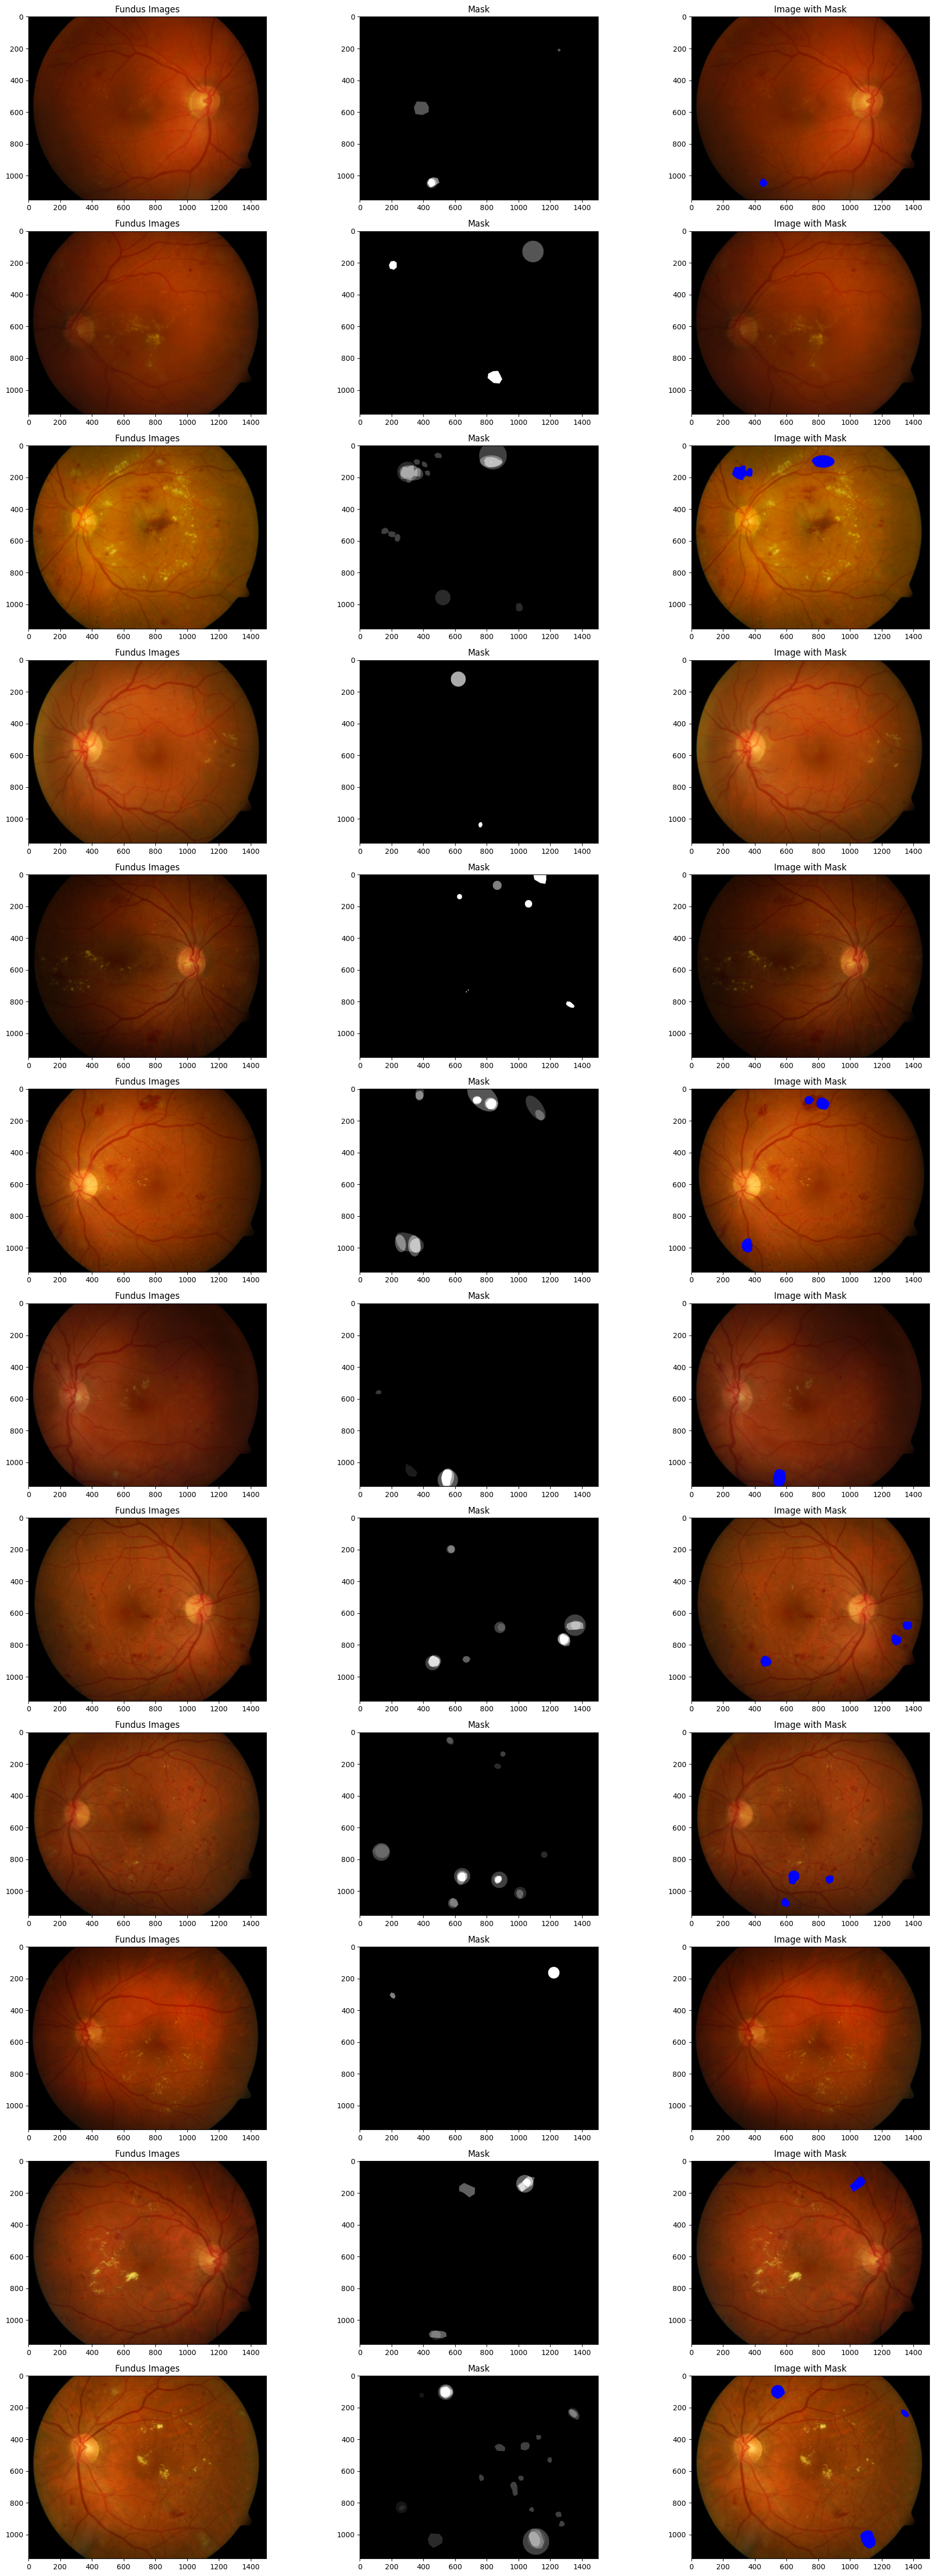

In [ ]:
#VISULAIZATION OF IMAGE AND MASK
count = 0
fig, axs = plt.subplots(12, 3, figsize = (20, 50))
for i in range(len(DR_df)):
    if DR_df['mask'][i] ==1 and count <12:
        img = io.imread(DR_df.image_path[i])
        axs[count][0].title.set_text('Fundus Images')
        axs[count][0].imshow(img)

        mask = io.imread(DR_df.mask_path[i])
        axs[count][1].title.set_text('Mask')
        axs[count][1].imshow(mask, cmap = 'gray')

        img[mask >= 120] = (0, 0, 255)
        axs[count][2].title.set_text('Image with Mask')
        axs[count][2].imshow(img)
        count+=1

fig.tight_layout()

CREATING A SINGLE DATAFRAME

In [ ]:
images=[]
label=[]
path='/content/drive/MyDrive/DIARETDB1/diaretdb1_v_1_1/resources/images/ddb1_groundtruth'
for i in range(0,len(all_files)):
    filepath=str(path+'/'+all_files[i][1])
    img=(cv2.imread(filepath))
    img=cv2.resize(img,(227,227))
    images.append(img)
    label.append(all_files[i][0])

In [ ]:
images=np.array(images)

In [ ]:
images.shape

(445, 227, 227, 3)

In [ ]:
y=pd.get_dummies(data.Labels)
print(y)

     fundusimages  hardexudates  hemorrhages  redsmalldots  softexudates
0           False         False        False          True         False
1           False         False        False          True         False
2           False         False        False          True         False
3           False         False        False          True         False
4           False         False        False          True         False
..            ...           ...          ...           ...           ...
440          True         False        False         False         False
441          True         False        False         False         False
442          True         False        False         False         False
443          True         False        False         False         False
444          True         False        False         False         False

[445 rows x 5 columns]


In [ ]:
input_shape=(227,227,3)

In [ ]:
#loading back the saved models using pickle
# Define the paths where the models are saved
import pickle

model_path = '/content/drive/MyDrive/model.pkl'
model1_path = '/content/drive/MyDrive/model1.pkl'
model2_path = '/content/drive/MyDrive/model2.pkl'

# Load the models back using pickle
with open(model_path, 'rb') as f:
    model = pickle.load(f)

with open(model1_path, 'rb') as f:
    model1 = pickle.load(f)

with open(model2_path, 'rb') as f:
    model2 = pickle.load(f)


In [ ]:
import pickle

# Load history objects from Google Drive
with open('/content/drive/MyDrive/cnn_history.pkl', 'rb') as file:
    cnn_history = pickle.load(file)

with open('/content/drive/MyDrive/resnet_history.pkl', 'rb') as file:
    resnet_history = pickle.load(file)

with open('/content/drive/MyDrive/densenet_history.pkl', 'rb') as file:
    densenet_history = pickle.load(file)

CNN - Modified AlexNet

In [ ]:
# model=Sequential()
# model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),strides=(4,4)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
# model.add(BatchNormalization())

# model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
# model.add(BatchNormalization())
# model.add(Flatten())
# model.add(Dense(4096, input_shape=(227*227*3,)))
# model.add(Activation('relu'))
# model.add(Dropout(0.4))
# model.add(BatchNormalization())
# model.add(Dense(4096, input_shape=(224*224*3,)))
# model.add(Activation('relu'))
# model.add(Dropout(0.4))
# model.add(BatchNormalization())
# model.add(Dense(5))
# model.add(Activation('softmax'))
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 batch_normalization (Batch  (None, 55, 55, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 27, 27, 96)        384       
 chNormalization)                                                
                                                        

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(images, y, shuffle=True, random_state=42, test_size=0.2)
x_test,x_val,y_test,y_val=train_test_split(x_test, y_test, shuffle=True, random_state=42, test_size=0.5 )

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [ ]:
! pip install h5py

In [ ]:
from keras.callbacks import ModelCheckpoint

model_checkpoint=ModelCheckpoint('Model.h5', monitor='acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(x_train, y_train, epochs=100, verbose=2, callbacks=[model_checkpoint])

Epoch 1/100

Epoch 1: acc improved from -inf to 0.43820, saving model to Model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 - 25s - loss: 3.0428 - acc: 0.4382 - 25s/epoch - 2s/step
Epoch 2/100

Epoch 2: acc improved from 0.43820 to 0.54775, saving model to Model.h5
12/12 - 11s - loss: 1.4936 - acc: 0.5478 - 11s/epoch - 884ms/step
Epoch 3/100

Epoch 3: acc improved from 0.54775 to 0.57584, saving model to Model.h5
12/12 - 9s - loss: 1.3498 - acc: 0.5758 - 9s/epoch - 788ms/step
Epoch 4/100

Epoch 4: acc did not improve from 0.57584
12/12 - 1s - loss: 1.1457 - acc: 0.5534 - 598ms/epoch - 50ms/step
Epoch 5/100

Epoch 5: acc did not improve from 0.57584
12/12 - 1s - loss: 1.1555 - acc: 0.5646 - 528ms/epoch - 44ms/step
Epoch 6/100

Epoch 6: acc improved from 0.57584 to 0.57865, saving model to Model.h5
12/12 - 3s - loss: 1.1787 - acc: 0.5787 - 3s/epoch - 264ms/step
Epoch 7/100

Epoch 7: acc improved from 0.57865 to 0.63483, saving model to Model.h5
12/12 - 4s - loss: 0.9195 - acc: 0.6348 - 4s/epoch - 296ms/step
Epoch 8/100

Epoch 8: acc did not improve from 0.63483
12/12 - 1s - loss: 1.1697 - acc: 0.6011 - 

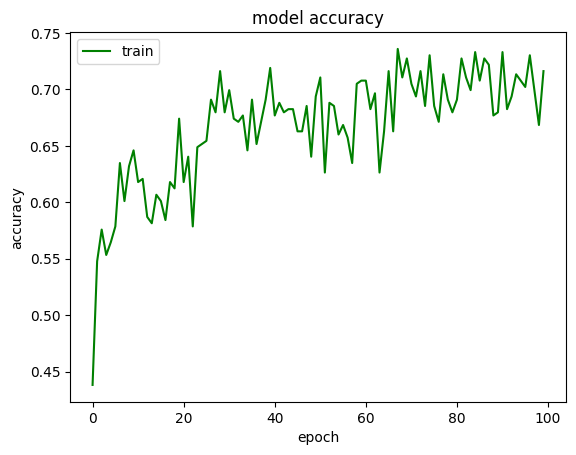

In [ ]:
plt.plot(cnn_history['acc'], color='Green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

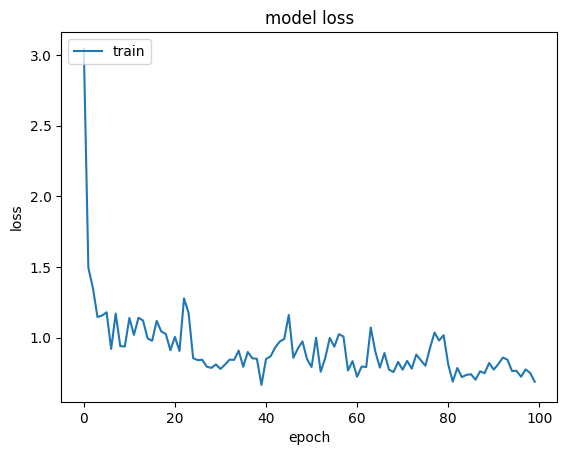

In [ ]:
plt.plot(cnn_history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# from keras.models import load_model
# model=load_model('Model.h5')

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

2/2 [==============================] - 6s 2s/step - loss: 4.9509 - acc: 0.7500


In [ ]:
print("Test Loss: ",test_loss)
print("Test Accuracy: ",round(test_acc*100,2),"%")

Test Loss:  4.950941562652588
Test Accuracy:  75.0 %


RESNET50

In [ ]:
directory = "/content/drive/MyDrive/CAPSTONE/DIARETDB1/diaretdb1_v_1_1/resources/images/ddb1_groundtruth"

DATA AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

datagen.fit(x_train)

In [ ]:
x_train.shape

(356, 227, 227, 3)

In [ ]:
# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras import layers

# # **RESNET50 MODEL**
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(227, 227, 3))
# base_model.trainable = False

# x = base_model.output
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)
# predictions = Dense(5, activation='softmax')(x)

# model1 = Model(inputs=base_model.input, outputs=predictions)

# model1.compile(optimizer=optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# model_checkpoint1 = ModelCheckpoint('Model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# history1 = model1.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
#                     steps_per_epoch=len(x_train) / 32, epochs=100,
#                     validation_data=(x_test, y_test),
#                     callbacks=[model_checkpoint1])

In [ ]:
test_loss1, test_acc1 = model1.evaluate(x_test, y_test, verbose=1)

print("Test Loss: ",test_loss1)
print("Test Accuracy: ",round(test_acc1*100,2),"%")

2/2 [==============================] - 25s 3s/step - loss: 0.4799 - accuracy: 0.8182
Test Loss:  0.4798566997051239
Test Accuracy:  81.82 %


In [ ]:
predictions = model1.predict(x_test[:5])
print(predictions)

1/1 [==============================] - 2s 2s/step
[[1.0000000e+00 2.2608180e-16 9.3973514e-17 2.0356639e-17 4.3169047e-17]
 [2.7839448e-08 5.3350382e-02 3.5504675e-01 8.0490939e-02 5.1111192e-01]
 [1.0000000e+00 4.7584647e-15 1.9639865e-15 2.4233859e-16 1.3849394e-16]
 [1.0000000e+00 2.6083102e-14 2.0019816e-15 1.4435454e-14 6.2095171e-17]
 [2.2467067e-18 1.3852325e-12 2.7809295e-07 9.9999976e-01 1.6503862e-10]]


In [ ]:
y_true = y_test.values.flatten()  # Convert to 1D array
print(y_test.shape)

(44, 5)


DENSENET201

In [ ]:
# # **DENSENET201 MODEL**
# base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(227, 227, 3))
# base_model.trainable = False

# x = base_model.output
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)
# predictions = Dense(5, activation='softmax')(x)

# model2 = Model(inputs=base_model.input, outputs=predictions)

# model2.compile(optimizer=optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# model_checkpoint2 = ModelCheckpoint('Model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# history2 = model2.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
#                     steps_per_epoch=len(x_train) / 32, epochs=100,
#                     validation_data=(x_test, y_test),
#                     callbacks=[model_checkpoint2])

In [ ]:
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=1)

print("Test Loss: ",test_loss2)
print("Test Accuracy: ",round(test_acc2*100,2),"%")


2/2 [==============================] - 26s 3s/step - loss: 0.5691 - accuracy: 0.7955
Test Loss:  0.5691471099853516
Test Accuracy:  79.55 %


In [ ]:
predictions2 = model2.predict(x_test[:5])
print(predictions2)

1/1 [==============================] - 6s 6s/step
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [6.6424985e-03 1.3581383e-01 2.8202209e-01 1.2812229e-01 4.4739929e-01]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 2.1083674e-31 1.3623906e-25 5.7732659e-24 3.7484436e-26]
 [1.2573484e-05 2.0802823e-04 9.4450712e-03 9.8985964e-01 4.7476657e-04]]


**SAVING AND LAODING MODELS USING PICKLE**

In [ ]:
# #saving models using pickle

# import pickle

# # Define the paths
# model_path = '/content/drive/MyDrive/model.pkl'
# model1_path = '/content/drive/MyDrive/model1.pkl'
# model2_path = '/content/drive/MyDrive/model2.pkl'

# # Save the models using pickle
# with open(model_path, 'wb') as f:
#     pickle.dump(model, f)

# with open(model1_path, 'wb') as f:
#     pickle.dump(model1, f)

# with open(model2_path, 'wb') as f:
#     pickle.dump(model2, f)


In [ ]:
# import pickle

# # Save history objects to Google Drive
# with open('/content/drive/MyDrive/cnn_history.pkl', 'wb') as file:
#     pickle.dump(history.history, file)

# with open('/content/drive/MyDrive/resnet_history.pkl', 'wb') as file:
#     pickle.dump(history1.history, file)

# with open('/content/drive/MyDrive/densenet_history.pkl', 'wb') as file:
#     pickle.dump(history2.history, file)

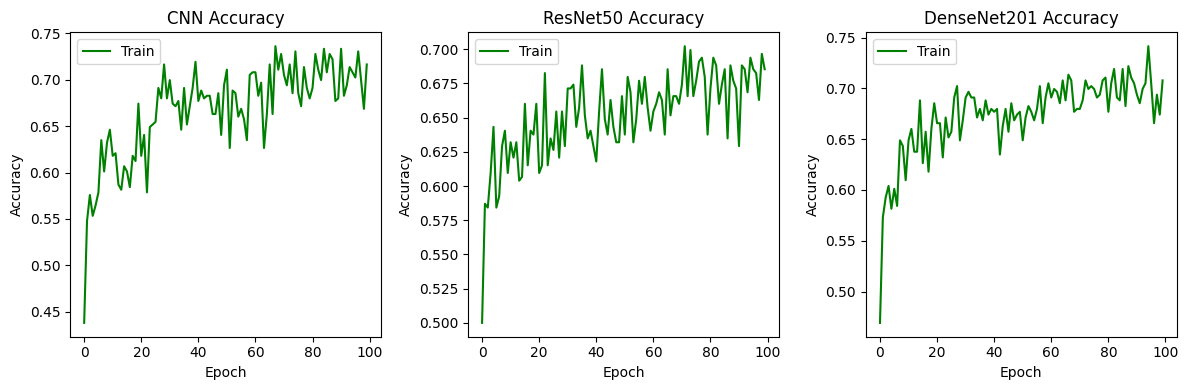

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(cnn_history['acc'], color='Green')
plt.title('CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 3, 2)
plt.plot(resnet_history['accuracy'], color='Green')
plt.title('ResNet50 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 3, 3)
plt.plot(densenet_history['accuracy'], color='Green')
plt.title('DenseNet201 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


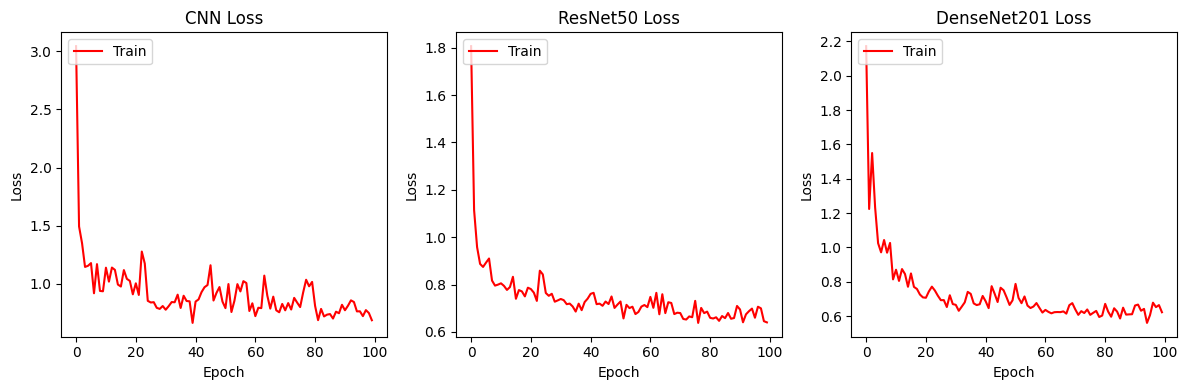

In [ ]:
# Plot the loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(cnn_history['loss'], color='Red')
plt.title('CNN Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 3, 2)
plt.plot(resnet_history['loss'], color='Red')
plt.title('ResNet50 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 3, 3)
plt.plot(densenet_history['loss'], color='Red')
plt.title('DenseNet201 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


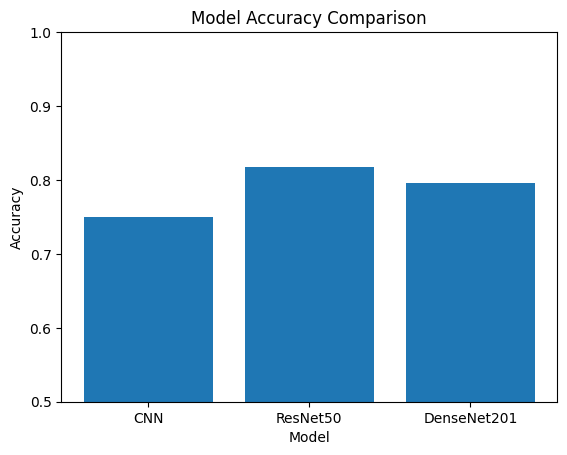

In [ ]:
import matplotlib.pyplot as plt

# Create a list of model names
model_names = ['CNN', 'ResNet50', 'DenseNet201']

# Create a list of accuracy values
accuracy_values = [test_acc, test_acc1, test_acc2]

# Create a bar chart of the accuracy values
plt.bar(model_names, accuracy_values)

# Set the title and labels of the chart
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylim(0.5,1)
plt.ylabel('Accuracy')

# Display the chart
plt.show()


2/2 [==============================] - 2s 435ms/step
Confusion matrix, without normalization
[[15  0  0  0  0]
 [ 0  4  0  2  0]
 [ 0  0  0  3  1]
 [ 0  0  0 14  0]
 [ 0  0  0  5  0]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.         0.66666667 0.         0.33333333 0.        ]
 [0.         0.         0.         0.75       0.25      ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         1.         0.        ]]


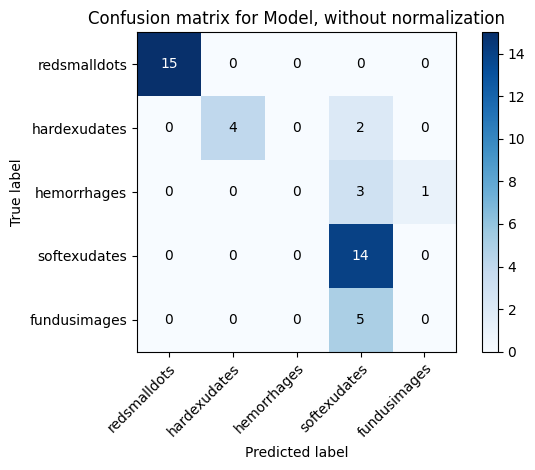

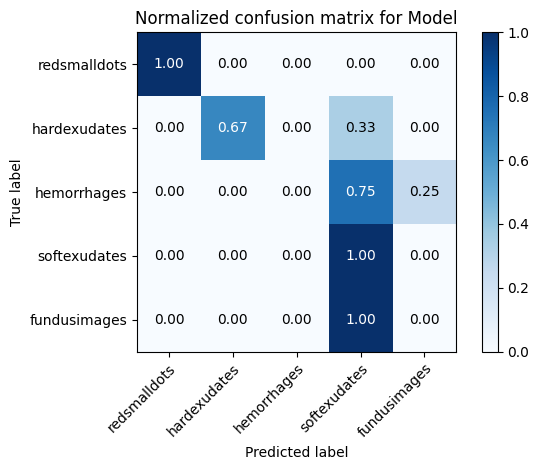

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
# Get predictions for model
predictions_model = model.predict(x_test)
y_pred_model = np.argmax(predictions_model, axis=1)
y_true_model = np.argmax(y_test.values, axis=1)

# Define class names
class_names_model = ['redsmalldots', 'hardexudates', 'hemorrhages', 'softexudates', 'fundusimages']

# Plot non-normalized confusion matrix for model
plot_confusion_matrix(y_true_model, y_pred_model, classes=class_names_model,
                      title='Confusion matrix for Model, without normalization')

# Plot normalized confusion matrix for model
plot_confusion_matrix(y_true_model, y_pred_model, classes=class_names_model, normalize=True,
                      title='Normalized confusion matrix for Model')

plt.show()

2/2 [==============================] - 10s 2s/step
Confusion matrix, without normalization
[[15  0  0  0  0]
 [ 0  5  0  1  0]
 [ 0  0  1  0  3]
 [ 0  0  1 10  3]
 [ 0  0  0  0  5]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.         0.83333333 0.         0.16666667 0.        ]
 [0.         0.         0.25       0.         0.75      ]
 [0.         0.         0.07142857 0.71428571 0.21428571]
 [0.         0.         0.         0.         1.        ]]


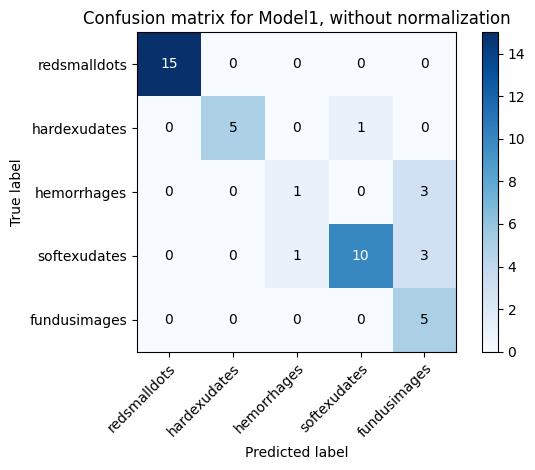

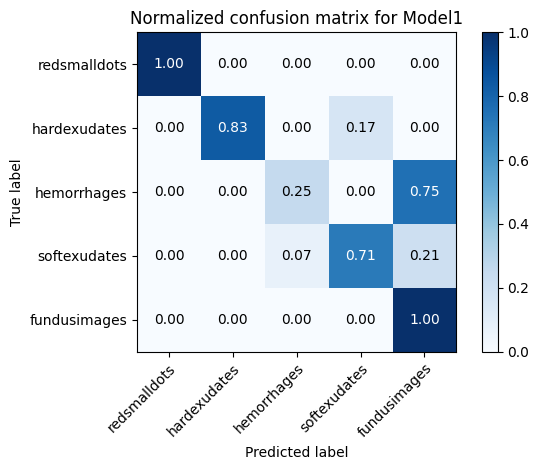

In [ ]:
# Get predictions for model1
predictions_model1 = model1.predict(x_test)
y_pred_model1 = np.argmax(predictions_model1, axis=1)
y_true_model1 = np.argmax(y_test.values, axis=1)

# Define class names
class_names_model1 = ['redsmalldots', 'hardexudates', 'hemorrhages', 'softexudates', 'fundusimages']

# Plot non-normalized confusion matrix for model1
plot_confusion_matrix(y_true_model1, y_pred_model1, classes=class_names_model1,
                      title='Confusion matrix for Model1, without normalization')

# Plot normalized confusion matrix for model1
plot_confusion_matrix(y_true_model1, y_pred_model1, classes=class_names_model1, normalize=True,
                      title='Normalized confusion matrix for Model1')

plt.show()


2/2 [==============================] - 12s 4s/step
Confusion matrix, without normalization
[[15  0  0  0  0]
 [ 0  5  0  1  0]
 [ 0  0  1  0  3]
 [ 0  0  2  9  3]
 [ 0  0  0  0  5]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.         0.83333333 0.         0.16666667 0.        ]
 [0.         0.         0.25       0.         0.75      ]
 [0.         0.         0.14285714 0.64285714 0.21428571]
 [0.         0.         0.         0.         1.        ]]


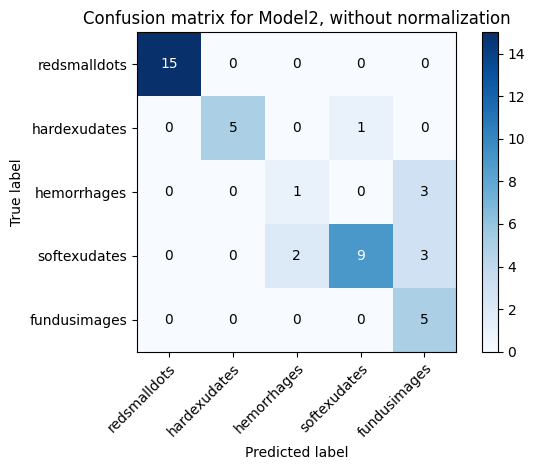

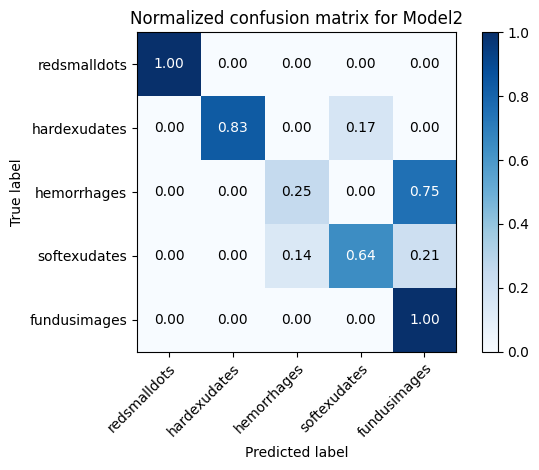

In [ ]:
# Get predictions for model2
predictions_model2 = model2.predict(x_test)
y_pred_model2 = np.argmax(predictions_model2, axis=1)
y_true_model2 = np.argmax(y_test.values, axis=1)

# Define class names
class_names_model2 = ['redsmalldots', 'hardexudates', 'hemorrhages', 'softexudates', 'fundusimages']

# Plot non-normalized confusion matrix for model2
plot_confusion_matrix(y_true_model2, y_pred_model2, classes=class_names_model2,
                      title='Confusion matrix for Model2, without normalization')

# Plot normalized confusion matrix for model2
plot_confusion_matrix(y_true_model2, y_pred_model2, classes=class_names_model2, normalize=True,
                      title='Normalized confusion matrix for Model2')

plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to make predictions and convert them to class labels
def predict_and_convert(model, x_data):
    predictions = model.predict(x_data)
    class_labels = np.argmax(predictions, axis=1)
    return class_labels

# Predict using the CNN model
cnn_predictions = predict_and_convert(model, x_test)

# Predict using the ResNet50 model
resnet_predictions = predict_and_convert(model1, x_test)

# Predict using the DenseNet201 model
densenet_predictions = predict_and_convert(model2, x_test)

# Convert one-hot encoded labels to class labels for y_test
y_true = np.argmax(np.array(y_test), axis=1)


2/2 [==============================] - 11s 4s/step


In [ ]:
from sklearn.metrics import classification_report

# Function to print classification report
def print_classification_report(y_true, y_pred, model_name):
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred, target_names=labels))

# Print classification reports for each model
print_classification_report(y_true, cnn_predictions, 'CNN')
print_classification_report(y_true, resnet_predictions, 'ResNet50')
print_classification_report(y_true, densenet_predictions, 'DenseNet201')

Classification Report for CNN:
              precision    recall  f1-score   support

redsmalldots       1.00      1.00      1.00        15
hardexudates       1.00      0.67      0.80         6
 hemorrhages       0.00      0.00      0.00         4
softexudates       0.58      1.00      0.74        14
fundusimages       0.00      0.00      0.00         5

    accuracy                           0.75        44
   macro avg       0.52      0.53      0.51        44
weighted avg       0.66      0.75      0.68        44

Classification Report for ResNet50:
              precision    recall  f1-score   support

redsmalldots       1.00      1.00      1.00        15
hardexudates       1.00      0.83      0.91         6
 hemorrhages       0.50      0.25      0.33         4
softexudates       0.91      0.71      0.80        14
fundusimages       0.45      1.00      0.62         5

    accuracy                           0.82        44
   macro avg       0.77      0.76      0.73        44
weighted a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 2s 432ms/step


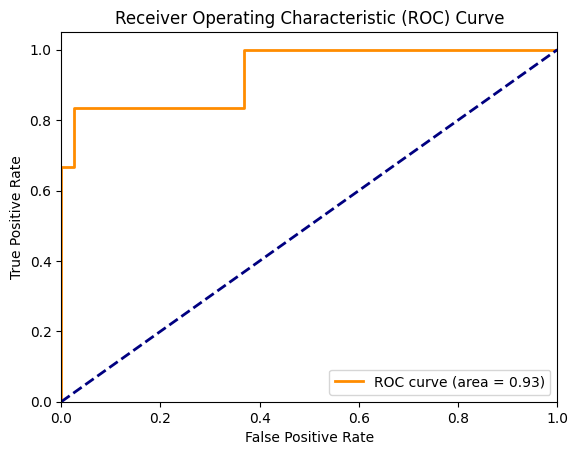

Sensitivity: 0.6666666666666666
Specificity: 1.0


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Make predictions on the test data
predictions = model.predict(x_test)

# Convert one-hot encoded labels to binary format
y_test_binary = y_test.iloc[:, 1]  # Assuming the positive class is represented by the second column

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, predictions[:, 1])
roc_auc = auc(fpr, tpr)
T
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute sensitivity and specificity for a specific threshold (e.g., 0.5)
threshold = 0.5
predicted_labels = (predictions[:, 1] > threshold).astype(int)
true_positives = np.sum((y_test_binary == 1) & (predicted_labels == 1))
false_positives = np.sum((y_test_binary == 0) & (predicted_labels == 1))
true_negatives = np.sum((y_test_binary == 0) & (predicted_labels == 0))
false_negatives = np.sum((y_test_binary == 1) & (predicted_labels == 0))

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

2/2 [==============================] - 23s 5s/step


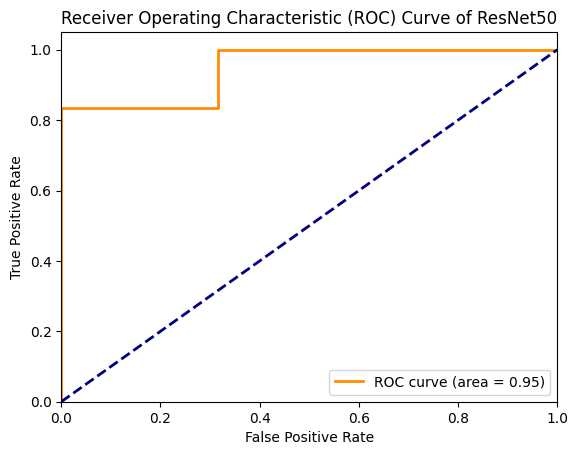

Sensitivity: 0.8333333333333334
Specificity: 1.0


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Make predictions on the test data
predictions = model1.predict(x_test)

# Convert one-hot encoded labels to binary format
y_test_binary = y_test.iloc[:, 1]  # Assuming the positive class is represented by the second column

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, predictions[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of ResNet50')
plt.legend(loc="lower right")
plt.show()

# Compute sensitivity and specificity for a specific threshold (e.g., 0.5)
threshold = 0.5
predicted_labels = (predictions[:, 1] > threshold).astype(int)
true_positives = np.sum((y_test_binary == 1) & (predicted_labels == 1))
false_positives = np.sum((y_test_binary == 0) & (predicted_labels == 1))
true_negatives = np.sum((y_test_binary == 0) & (predicted_labels == 0))
false_negatives = np.sum((y_test_binary == 1) & (predicted_labels == 0))

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

2/2 [==============================] - 11s 3s/step


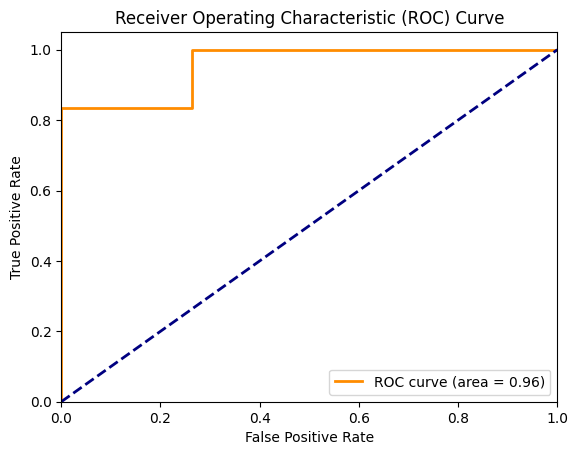

Sensitivity: 0.8333333333333334
Specificity: 1.0


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Make predictions on the test data
predictions = model2.predict(x_test)

# Convert one-hot encoded labels to binary format
y_test_binary = y_test.iloc[:, 1]  # Assuming the positive class is represented by the second column

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, predictions[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
# Compute sensitivity and specificity for a specific threshold (e.g., 0.5)
threshold = 0.5
predicted_labels = (predictions[:, 1] > threshold).astype(int)
true_positives = np.sum((y_test_binary == 1) & (predicted_labels == 1))
false_positives = np.sum((y_test_binary == 0) & (predicted_labels == 1))
true_negatives = np.sum((y_test_binary == 0) & (predicted_labels == 0))
false_negatives = np.sum((y_test_binary == 1) & (predicted_labels == 0))

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)